# Tokenização:

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer 

sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

# num_words vai priorizar as palavras que mais se repetem

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


Primeiro temos o Tokenizer, ele apenas atribui um numero para cada palavra

# Padding:

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

# Inserimos o OOV para trabalhar com palavras que não estão catalogadas

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

# O Pad define blocos com o mesmo tamanho para todas as sequencias
padded = pad_sequences(sequences, maxlen=5)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]


In [4]:
padded = pad_sequences(sequences, maxlen=8)
print("\nPadded Sequences:")
print(padded)


Padded Sequences:
[[ 0  0  0  0  5  3  2  4]
 [ 0  0  0  0  5  3  2  7]
 [ 0  0  0  0  6  3  2  4]
 [ 0  8  6  9  2  4 10 11]]


In [5]:
# Testar com dados não catalogados

test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=8)
print("\nPadded Test Sequence: ")
print(padded)


Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded Test Sequence: 
[[0 0 0 5 1 3 2 4]
 [0 0 0 2 4 1 2 1]]


# Treino com Classificação:

In [6]:
import json
import tensorflow as tf

In [7]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [8]:
len(datastore)

26709

In [9]:
sentences[0:5]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way']

In [10]:
labels[0:5]

[0, 0, 1, 1, 0]

In [11]:
training_size = 20000

In [12]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [13]:
vocab_size = 10000
oov_tok = "<OOV>"
max_length = 100
padding_type='post'
trunc_type='post'

In [14]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [15]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [16]:
embedding_dim = 16

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

NameError: name 'history' is not defined

In [20]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)
# shape: (vocab_size, embedding_dim)

(10000, 16)


In [21]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 415ms/step
[[0.5004331 ]
 [0.50034016]]


# LSTM:

In [22]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [23]:
tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# print(tokenizer.word_index)
print(total_words)

2690


In [24]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [25]:
xs

array([[  0,   0,   0, ...,   0,   0,  51],
       [  0,   0,   0, ...,   0,  51,  12],
       [  0,   0,   0, ...,  51,  12,  96],
       ...,
       [  0,   0,   0, ...,   0,   0,  47],
       [  0,   0,   0, ...,   0,  47, 105],
       [  0,   0,   0, ...,  47, 105, 138]])

In [25]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [26]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
377/377 [==============================] - 12s 26ms/step - loss: 6.6082 - accuracy: 0.0736
Epoch 2/100
377/377 [==============================] - 10s 25ms/step - loss: 5.6894 - accuracy: 0.1180
Epoch 3/100
377/377 [==============================] - 10s 25ms/step - loss: 4.7909 - accuracy: 0.1679
Epoch 4/100
377/377 [==============================] - 10s 26ms/step - loss: 3.8598 - accuracy: 0.2478
Epoch 5/100
377/377 [==============================] - 10s 26ms/step - loss: 3.0658 - accuracy: 0.3439
Epoch 6/100
377/377 [==============================] - 9s 25ms/step - loss: 2.4182 - accuracy: 0.4507
Epoch 7/100
377/377 [==============================] - 9s 25ms/step - loss: 1.9538 - accuracy: 0.5427
Epoch 8/100
377/377 [==============================] - 10s 26ms/step - loss: 1.6401 - accuracy: 0.6102
Epoch 9/100
377/377 [==============================] - 9s 25ms/step - loss: 1.4527 - accuracy: 0.6499
Epoch 10/100
377/377 [==============================] - 10s 25ms/step - loss

In [27]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

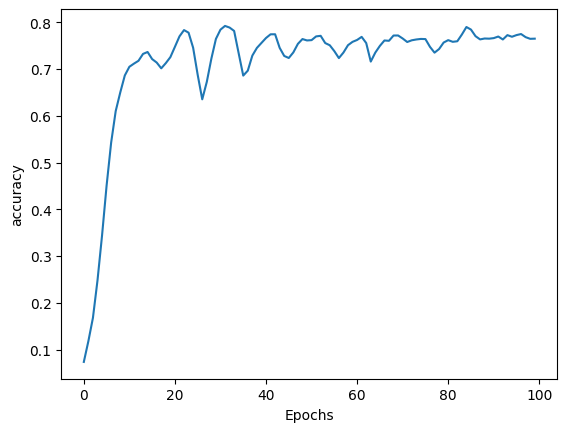

In [28]:
plot_graphs(history, 'accuracy')

In [39]:
seed_text = "I like this town"
next_words = 21
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 18ms/step
I like this town to the long generation her fame will see her can carry two irishmen each blue gone away light to your side
